In [9]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

This part of the assignment deals with discrete Fourier transform as well as python programming.

## Instructions:

Please rename this file with Your Roll No.

1.   Only edit at "### WRITE YOUR CODE HERE"
2.   Please rename this file with Your Roll No.
3.   Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here




In [10]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow
from skimage.color import rgb2gray

Upload 'pic1.jpg' and 'pic2.jpg' files manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the images.

In [11]:
img1 = cv2.imread('pic1.jpg',0)

Run below code block to display the uploaded image.

(520, 860)

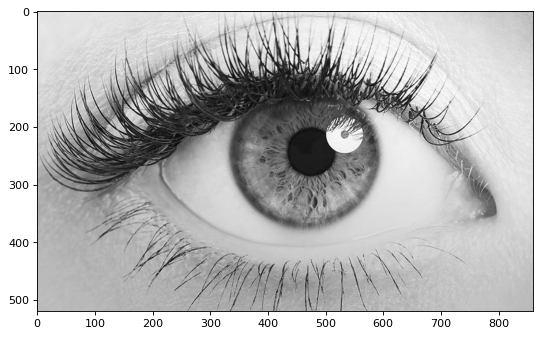

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img1, cmap='gray');
img1.shape

Calculate the 2-D Fourier Transform of the input image



In [13]:
def dft_xs(img):
    '''
    Inputs:
        img_gray - Original image size N x N
    Outputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
    '''
    ### Begin

    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft = np.fft.fftshift(dft)

    Xs = 20*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
    fs = cv2.phase(dft[:,:,0],dft[:,:,1])
    
    ### End
    return Xs, fs

Calculate the 2-D Inverse Fourier Transform of the input image

In [39]:
def idft_xs(Xs,fs):
    '''
    Inputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
        
    Outputs:
        img_gray_recon - Original image size N x N
    '''
    ### Begin

    fft_shift = np.zeros((Xs.shape[0],Xs.shape[1],2))
    mag1 = np.divide(Xs,20)
    mag1 = np.exp(mag1)
    fft_shift[:,:,0] = mag1*np.cos(fs)
    fft_shift[:,:,1] = mag1*np.sin(fs)
    fft2=np.fft.ifftshift(fft_shift)
    img_gray_recon = cv2.idft(fft2)
    img_gray_recon = cv2.magnitude(img_gray_recon[:,:,0],img_gray_recon[:,:,1])
    img_gray_recon = np.divide(img_gray_recon,(Xs.shape[0]*Xs.shape[1]))
    
    ### Enter you code here

    ### End
    return np.uint8(img_gray_recon)

Low Pass filtering of the image in frequency domain

In [15]:
def lowpass(img2, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                  - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
           img_gray_recon - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Also, use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin
  filter_mask = np.zeros((img2.shape[0],img2.shape[1]))
  Xs,fs = dft_xs(img2)
  Xs_filter = np.zeros(Xs.shape)
  fs_filter = np.zeros(fs.shape)
  mid_value = np.zeros((2,1))
  mid_value[0] = img2.shape[0]/2
  mid_value[1] = img2.shape[1]/2
  m1 = int(np.floor(mid_value[0]-fc))
  m2 = int(np.ceil(mid_value[0]+fc))
  n1 = int(np.floor(mid_value[1]-fc))
  n2 = int(np.ceil(mid_value[1]+fc))

  filter_mask[m1:m2,n1:n2] = np.ones((m2-m1,n2-n1))

  Xs_filter = np.multiply(Xs,filter_mask)
  fs_filter = np.multiply(fs,filter_mask)

  img_out_low = idft_xs(Xs_filter,fs_filter)
  #plt.figure(figsize=(8,6))
  #plt.imshow(filter_mask,cmap='gray'); plt.title("LPF mask")
    ### End
  return img_out_low

High Pass filtering of the image in frequency domain

In [16]:
def highpass(img2, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                     - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           img_gray_recon - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  filter_mask = np.ones((img2.shape[0],img2.shape[1]))
  Xs,fs = dft_xs(img2)
  Xs_filter = np.zeros(Xs.shape)
  fs_filter = np.zeros(fs.shape)
  mid_value = np.zeros((2,1))
  mid_value[0] = img2.shape[0]/2
  mid_value[1] = img2.shape[1]/2
  m1 = int(np.floor(mid_value[0]-fc))
  m2 = int(np.ceil(mid_value[0]+fc))
  n1 = int(np.floor(mid_value[1]-fc))
  n2 = int(np.ceil(mid_value[1]+fc))

  filter_mask[m1:m2,n1:n2] = np.zeros((m2-m1,n2-n1))
  
  Xs_filter = np.multiply(Xs,filter_mask)
  fs_filter = np.multiply(fs,filter_mask)

  img_out_high = idft_xs(Xs_filter,fs_filter)
  #plt.figure(figsize=(8,6))
  #plt.imshow(filter_mask,cmap='gray'); plt.title("HPF mask")

    ### End
  return img_out_high

Band Reject filtering of the image in frequency domain

In [17]:
def bandreject(img2, fL, fH):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fL & fH   - cutoff frequency 
                     - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           img_gray_recon - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  filter_mask = np.ones((img2.shape[0],img2.shape[1]))
  Xs,fs = dft_xs(img2)
  Xs_filter = np.zeros(Xs.shape)
  fs_filter = np.zeros(fs.shape)
  mid_value = np.zeros((2,1))
  mid_value[0] = img2.shape[0]/2
  mid_value[1] = img2.shape[1]/2
  m1 = int(np.floor(mid_value[0]-fH))
  m2 = int(np.ceil(mid_value[0]+fH))
  n1 = int(np.floor(mid_value[1]-fH))
  n2 = int(np.ceil(mid_value[1]+fH))
  filter_mask[m1:m2,n1:n2] = np.zeros((m2-m1,n2-n1))
  m1 = int(np.floor(mid_value[0]-fL))
  m2 = int(np.ceil(mid_value[0]+fL))
  n1 = int(np.floor(mid_value[1]-fL))
  n2 = int(np.ceil(mid_value[1]+fL))
  filter_mask[m1:m2,n1:n2] = np.ones((m2-m1,n2-n1))
  
  Xs_filter = np.multiply(Xs,filter_mask)
  fs_filter = np.multiply(fs,filter_mask)
  #plt.figure(figsize=(8,6))
  #plt.imshow(filter_mask,cmap='gray'); plt.title("BRF filter mask")
  img_out_bandrej = idft_xs(Xs_filter,fs_filter)

    ### End
  return img_out_bandrej

In [18]:
# Do not change codes inside this cell

img2 = cv2.imread('pic2.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)


Text(0.5, 1.0, 'Reconstructed Image')

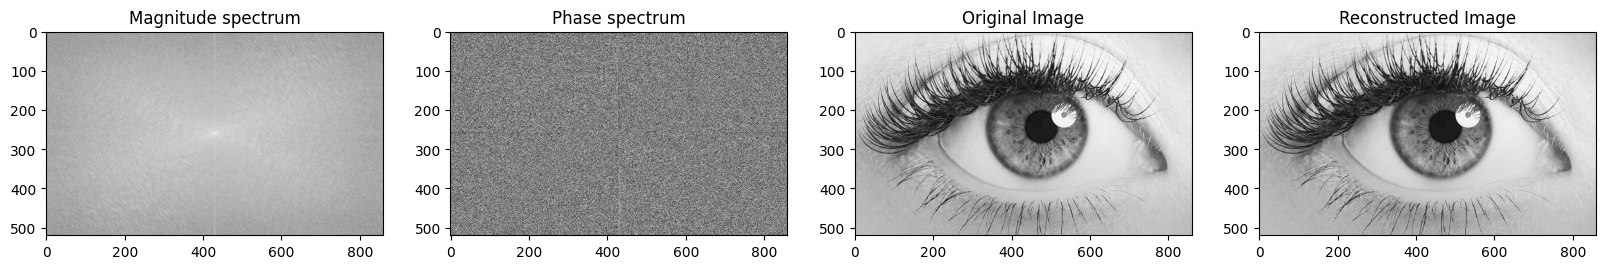

In [40]:
# Test dft_xs() and idft_xs()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = dft_xs(img1)
img_recon = idft_xs(mag_spectrum, phase_spectrum)
plt.figure(figsize=(20,20),dpi=100)
plt.subplot(1,4,1)

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255

plt.imshow(tmp,cmap='gray'); plt.title("Magnitude spectrum")
plt.subplot(1,4,2)

temp = phase_spectrum
temp -= np.min(temp)
if np.max(temp) != 0:
    temp /= np.max(temp)
temp *= 255

plt.imshow(temp,cmap='gray'); plt.title("Phase spectrum")
plt.subplot(1,4,3)
plt.imshow(img1,cmap='gray'); plt.title("Original Image")
plt.subplot(1,4,4)
plt.imshow(img_recon,cmap='gray'); plt.title("Reconstructed Image")

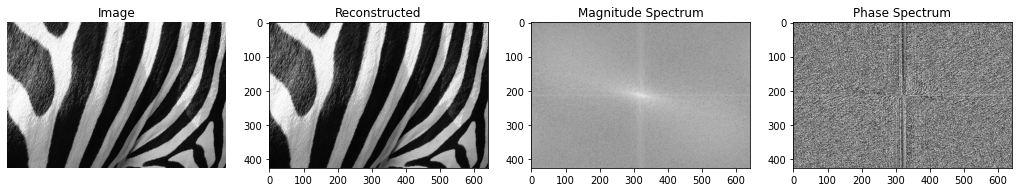

In [20]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = dft_xs(img2)
img_recon = idft_xs(mag_spectrum, phase_spectrum)
plt.figure(figsize=(18, 6))
plot_frame(1, 4, 0, img2, "Image")
plot_frame(1, 4, 1, img_recon, "Reconstructed", axis=True)
tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 4, 2, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 4, 3, phase_spectrum, "Phase Spectrum", axis=True)

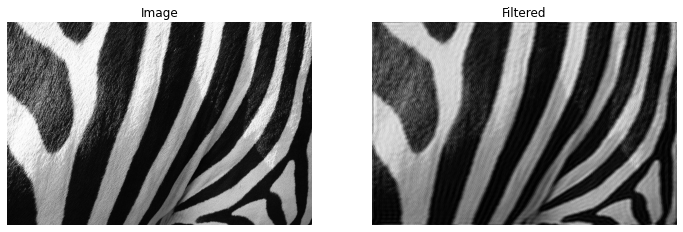

In [21]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work subjectively sufficiently

def plot_bandreject_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(img2.shape[0]/2)
        
    img2_filtered = bandreject(img2, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, img2, "Image")
    plot_frame(1, 2, 1, img2_filtered, "Filtered")


#############################
# Replace with your value for fL and fH
fL = 50
fH = 130
#############################
plot_bandreject_output(fL, fH)

In [22]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fc for Low Pass and High Pass filters 
# so that the filter:
# 1. covers 25% of the area in magnitude spectrum, call it fc_quart
# 2. covers 50% of the area in magnitude spectrum, call it fc_half



#############################

fc_quart = math.sqrt((img2.shape[0]*img2.shape[1])/4)
fc_half = math.sqrt((img2.shape[0]*img2.shape[1])/2)
fc_quart = fc_quart/2
fc_half = fc_half/2
print(fc_half,fc_quart)
#############################



184.60769214742922 130.53735097664577


### Observations

[[ 67.22024845  57.1910308   48.38291563 ... 100.97328656  89.5537487
   78.13740725]
 [ 85.34168755  72.71777738  61.22779347 ... 124.84142525 112.0053934
   98.62732606]
 [101.30402029  86.22403646  72.25443625 ... 146.49054605 132.1908367
  116.86810077]
 ...
 [ 15.57121357  11.70935865   9.57721371 ...  37.50750968  28.60284028
   21.22617449]
 [ 30.68335139  25.26312966  21.36737677 ...  55.21943333  45.86414352
   37.59947343]
 [ 48.43170923  40.89398631  34.70416533 ...  77.0267802   66.81024332
   57.158879  ]]
[[105.16907973  54.47231057  23.46806399 ... 155.1988257  164.66459009
  148.92431463]
 [111.74498295  45.12859379  16.22211485 ... 176.3522659  186.81284841
  169.70663615]
 [ 98.42873096  32.46756924  17.72813872 ... 173.21306761 200.05412818
  172.80969048]
 ...
 [ 11.75301792   8.97742008   6.3999389  ...  10.90062198  14.55000408
   14.09000595]
 [ 15.7005168    0.21132738   4.26311421 ...   7.78909969  22.63221712
   26.88020143]
 [ 55.02960842  21.6179631    6.600

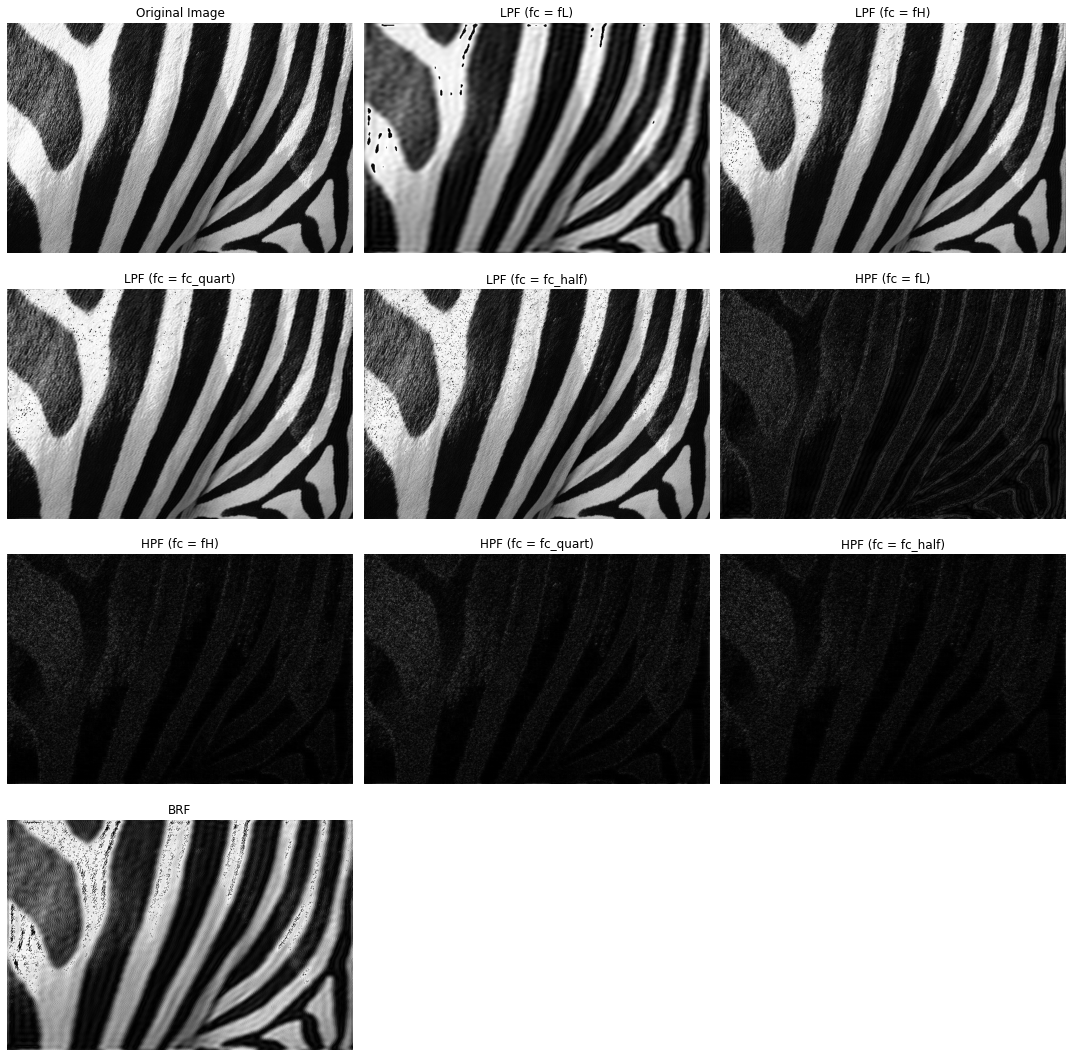

In [38]:
# Do not change codes inside this cell
# Add your observations in next cell
fL=35
fH=140

plt.figure(figsize=(15,15))
plot_frame(4, 3, 0, img2, "Original Image")

tmp1 = lowpass(img2, fL)
plot_frame(4, 3, 1, tmp1, "LPF (fc = fL)")

tmp2 = lowpass(img2, fH)
plot_frame(4, 3, 2, tmp2, "LPF (fc = fH)")

tmp3 = lowpass(img2, fc_quart)
plot_frame(4, 3, 3, tmp3, "LPF (fc = fc_quart)")

tmp4 = lowpass(img2, fc_half)
plot_frame(4, 3, 4, tmp4, "LPF (fc = fc_half)")

tmp5 = highpass(img2, fL)
plot_frame(4, 3, 5, tmp5, "HPF (fc = fL)")

tmp6 = highpass(img2, fH)
plot_frame(4, 3, 6, tmp6, "HPF (fc = fH)")

tmp7 = highpass(img2, fc_quart)
plot_frame(4, 3, 7, tmp7, "HPF (fc = fc_quart)")

tmp8 = highpass(img2, fc_half)
plot_frame(4, 3, 8, tmp8, "HPF (fc = fc_half)")

tmp9 = bandreject(img2, fL,fH)
plot_frame(4, 3, 9, tmp9, "BRF")
plt.tight_layout()

In [24]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = '''Variation in Adjacent pixel values gives the frequency information,Using LPF we can observe that image is smoothing or blurring at sharp edges 
in image (i.e., eye variation) and retaining the low frequency information within an image while reducing the high frequency information
(i.e., LPF removes the eye variation according to cutoff frequency).

Using HPF, allows only eye variations of pixel and removes the low variations (i.e., uniform adjacent pixels) and it gives more details about 
the edges and boundaries,it sharpes the image and removes low-frequency components from an image and preserves high-frequency components.

Using BRF, we can observe that it is a combination of LPF and HPF, where it is removing noise present in certain range of frequencies.
also it is attenuating specific range of frequencies to low levels.




'''

print(your_observation)

Variation in Adjacent pixel values gives the frequency information,Using LPF we can observe that image is smoothing or blurring at sharp edges 
in image (i.e., eye variation) and retaining the low frequency information within an image while reducing the high frequency information
(i.e., LPF removes the eye variation according to cutoff frequency).

Using HPF, allows only eye variations of pixel and removes the low variations (i.e., uniform adjacent pixels) and it gives more details about 
the edges and boundaries,it sharpes the image and removes low-frequency components from an image and preserves high-frequency components.

Using BRF, we can observe that it is a combination of LPF and HPF, where it is removing noise present in certain range of frequencies.
also it is attenuating specific range of frequencies to low levels.





